In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import itertools
import seaborn as sns
import pandas_profiling
import statsmodels.formula.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

from sklearn import datasets
from sklearn.feature_selection import RFE
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

In [2]:
train = pd.read_csv('C:/Users/Jitesh Chandani/Desktop/Train.txt',sep=',')
test = pd.read_csv('C:/Users/Jitesh Chandani/Desktop/Test.txt',sep=',')

In [3]:
columns=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land",
"wrong_fragment","urgent","hot","num_failed_logins","logged_in",
"num_compromised","root_shell","su_attempted","num_root","num_file_creations",
"num_shells","num_access_files","num_outbound_cmds","is_host_login",
"is_guest_login","count","srv_count","serror_rate", "srv_serror_rate",
"rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
"dst_host_diff_srv_rate","dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
"dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

In [4]:
train.columns=columns
test.columns=columns

In [5]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [7]:
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22543 non-null  int64  
 1   protocol_type                22543 non-null  object 
 2   service                      22543 non-null  object 
 3   flag                         22543 non-null  object 
 4   src_bytes                    22543 non-null  int64  
 5   dst_bytes                    22543 non-null  int64  
 6   land                         22543 non-null  int64  
 7   wrong_fragment               22543 non-null  int64  
 8   urgent                       22543 non-null  int64  
 9   hot                          22543 non-null  int64  
 10  num_failed_logins            22543 non-null  int64  
 11  logged_in                    22543 non-null  int64  
 12  num_compromised              22543 non-null  int64  
 13  root_shell      

In [10]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,...,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,...,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


Now creating the attack list which will incorporate the type of attack.There are 4 major type of attack- normal,DoS,Probe,R2L,U2R 


In [11]:
train.loc[train.attack=='normal','attack_class']=0

train.loc[(train.attack=='back') | (train.attack=='land') | (train.attack=='pod') | (train.attack=='neptune') | 
         (train.attack=='smurf') | (train.attack=='teardrop') | (train.attack=='apache2') | (train.attack=='udpstorm') | 
         (train.attack=='processtable') | (train.attack=='worm') | (train.attack=='mailbomb'),'attack_class']=1

train.loc[(train.attack=='satan') | (train.attack=='ipsweep') | (train.attack=='nmap') | (train.attack=='portsweep') | 
          (train.attack=='mscan') | (train.attack=='saint'),'attack_class']=2

train.loc[(train.attack=='guess_passwd') | (train.attack=='ftp_write') | (train.attack=='imap') | (train.attack=='phf') | 
          (train.attack=='multihop') | (train.attack=='warezmaster') | (train.attack=='warezclient') | (train.attack=='spy') | 
          (train.attack=='xlock') | (train.attack=='xsnoop') | (train.attack=='snmpguess') | (train.attack=='snmpgetattack') | 
          (train.attack=='httptunnel') | (train.attack=='sendmail') | (train.attack=='named'),'attack_class']=3

train.loc[(train.attack=='buffer_overflow') | (train.attack=='loadmodule') | (train.attack=='rootkit') | (train.attack=='perl') | 
          (train.attack=='sqlattack') | (train.attack=='xterm') | (train.attack=='ps'),'attack_class']=4

In [12]:
test.loc[test.attack=='normal','attack_class']=0

test.loc[(test.attack=='back') | (test.attack=='land') | (test.attack=='pod') | (test.attack=='neptune') | 
         (test.attack=='smurf') | (test.attack=='teardrop') | (test.attack=='apache2') | (test.attack=='udpstorm') | 
         (test.attack=='processtable') | (test.attack=='worm') | (test.attack=='mailbomb'),'attack_class']=1

test.loc[(test.attack=='satan') | (test.attack=='ipsweep') | (test.attack=='nmap') | (test.attack=='portsweep') | 
          (test.attack=='mscan') | (test.attack=='saint'),'attack_class']=2

test.loc[(test.attack=='guess_passwd') | (test.attack=='ftp_write') | (test.attack=='imap') | (test.attack=='phf') | 
          (test.attack=='multihop') | (test.attack=='warezmaster') | (test.attack=='warezclient') | (test.attack=='spy') | 
          (test.attack=='xlock') | (test.attack=='xsnoop') | (test.attack=='snmpguess') | (test.attack=='snmpgetattack') | 
          (test.attack=='httptunnel') | (test.attack=='sendmail') | (test.attack=='named'),'attack_class']=3

test.loc[(test.attack=='buffer_overflow') | (test.attack=='loadmodule') | (test.attack=='rootkit') | (test.attack=='perl') | 
          (test.attack=='sqlattack') | (test.attack=='xterm') | (test.attack=='ps'),'attack_class']=4

In [13]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag,attack_class
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0.0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1.0
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0.0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0.0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1.0


In [14]:
output=pandas_profiling.ProfileReport(train)
output.to_file('pandas_profiling.html')

Summarize dataset:   0%|          | 0/57 [00:00<?, ?it/s]

C:\Users\Jitesh Chandani\anaconda3\lib\site-packages\scipy\stats\stats.py:4812: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))
C:\Users\Jitesh Chandani\anaconda3\lib\site-packages\scipy\stats\stats.py:4814: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(var) / np.sqrt(2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Exploratory Analysis

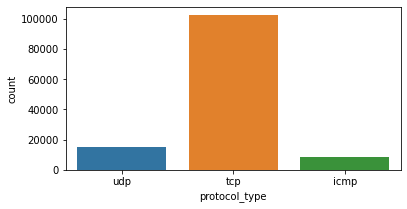

In [15]:
# Protocol type distribution
plt.figure(figsize=(6,3))
sns.countplot(x="protocol_type", data=train)
plt.show()

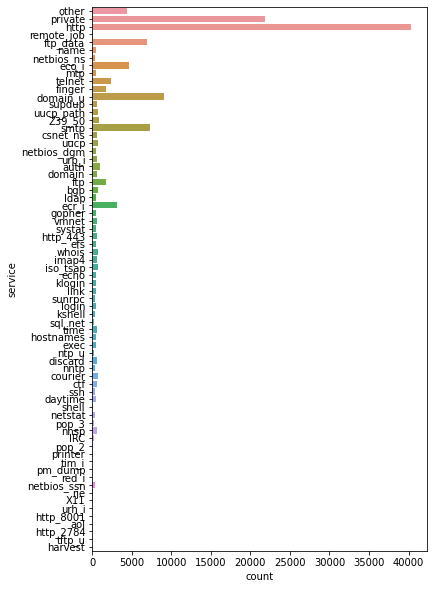

In [16]:
# service distribution
plt.figure(figsize=(6,10))
sns.countplot(y="service", data=train)
plt.show()

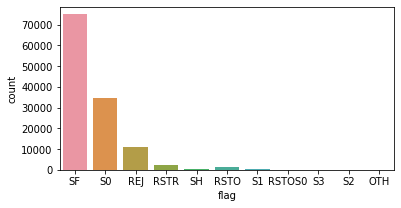

In [17]:
# flag distribution
plt.figure(figsize=(6,3))
sns.countplot(x="flag", data=train)
plt.show()

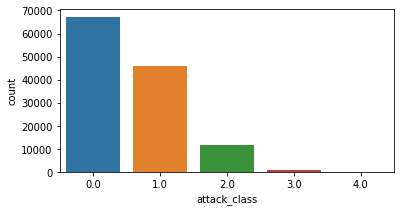

In [19]:
# attack class distribution
plt.figure(figsize=(6,3))
sns.countplot(x="attack_class", data=train)
plt.show()

In [20]:
numeric_var=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['object', 'O']]

In [21]:
numeric_var

['duration',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'last_flag',
 'attack_class']

In [22]:
cat_var

['protocol_type', 'service', 'flag', 'attack']

In [23]:
train_num=train[numeric_var]
test_num=test[numeric_var]
train_num.head(5)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag,attack_class
0,0,146,0,0,0,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,15,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,19,1.0
2,0,232,8153,0,0,0,0,0,1,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,21,0.0
3,0,199,420,0,0,0,0,0,1,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,21,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,21,1.0


In [24]:
train_cat=train[cat_var]
test_cat=test[cat_var]
train_cat.head(5)

,protocol_type,service,flag,attack
0,udp,other,SF,normal
1,tcp,private,S0,neptune
2,tcp,http,SF,normal
3,tcp,http,SF,normal
4,tcp,private,REJ,neptune


# Data Summary Report

In [25]:
# Creating Data audit Report
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=train_num.apply(lambda x: var_summary(x)).T

In [26]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
duration,125972.0,0.0,3.617247e+07,287.146929,0.00,2.604526e+03,6.783553e+06,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4.00,9590.58,4.290800e+04
src_bytes,125972.0,0.0,5.740179e+09,45567.100824,44.00,5.870354e+06,3.446106e+13,0.0,0.0,0.00,0.00,0.00,44.00,276.00,848.00,1480.00,54540.00,1.379964e+09
dst_bytes,125972.0,0.0,2.491634e+09,19779.271433,0.00,4.021285e+06,1.617073e+13,0.0,0.0,0.00,0.00,0.00,0.00,516.00,3375.90,8314.00,25519.00,1.309937e+09
land,125972.0,0.0,2.500000e+01,0.000198,0.00,1.408613e-02,1.984190e-04,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125972.0,0.0,2.858000e+03,0.022688,0.00,2.535310e-01,6.427796e-02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.000000e+00
urgent,125972.0,0.0,1.400000e+01,0.000111,0.00,1.436608e-02,2.063844e-04,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.000000e+00
hot,125972.0,0.0,2.575000e+04,0.204411,0.00,2.149977e+00,4.622401e+00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,7.700000e+01
num_failed_logins,125972.0,0.0,1.540000e+02,0.001222,0.00,4.523932e-02,2.046596e-03,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.000000e+00
logged_in,125972.0,0.0,4.985200e+04,0.395739,0.00,4.890107e-01,2.391315e-01,0.0,0.0,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.000000e+00
num_compromised,125972.0,0.0,3.517800e+04,0.279253,0.00,2.394214e+01,5.732259e+02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,7.479000e+03


In [27]:
num_summary.to_csv('num_summary.csv')

# Outliers

In [28]:
#Handling Outliers
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower=x.quantile(0.01))
    return x

train_num=train_num.apply(outlier_capping)

Since there is no Missing Data, we are not performing missing treatment

# Dummy Variable

In [30]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return(df)

In [31]:
#for c_feature in categorical_features
for c_feature in ['protocol_type', 'service', 'flag', 'attack']:
    train_cat = create_dummies(train_cat,c_feature)
    test_cat = create_dummies(test_cat,c_feature)
train_cat.head()

,protocol_type_tcp,protocol_type_udp,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,...,attack_phf,attack_pod,attack_portsweep,attack_rootkit,attack_satan,attack_smurf,attack_spy,attack_teardrop,attack_warezclient,attack_warezmaster
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
train_new = pd.concat([train_num, train_cat], axis=1)
test_new = pd.concat([test_num, test_cat], axis=1)
train_new.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,attack_phf,attack_pod,attack_portsweep,attack_rootkit,attack_satan,attack_smurf,attack_spy,attack_teardrop,attack_warezclient,attack_warezmaster
0,0.0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# correlation matrix (ranges from 1 to -1)
corrm=train_new.corr()
corrm

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,attack_phf,attack_pod,attack_portsweep,attack_rootkit,attack_satan,attack_smurf,attack_spy,attack_teardrop,attack_warezclient,attack_warezmaster
duration,1.000000,0.011740,0.036892,NaN,NaN,NaN,0.021274,NaN,-0.064538,0.062081,...,-0.000757,-0.005534,0.408874,-0.000414,-0.023837,-0.020279,0.000605,-0.011691,0.037013,-0.001571
src_bytes,0.011740,1.000000,0.127827,NaN,NaN,NaN,0.379973,NaN,0.163275,0.603363,...,-0.000898,0.002845,-0.022114,-0.001067,-0.028784,-0.002928,-0.000555,-0.013779,0.047995,-0.002012
dst_bytes,0.036892,0.127827,1.000000,NaN,NaN,NaN,0.127002,NaN,0.421999,0.237363,...,0.010050,-0.014104,-0.053377,0.006873,-0.060374,-0.051676,-0.000156,-0.029791,-0.011541,0.064962
land,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wrong_fragment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
attack_smurf,-0.020279,-0.002928,-0.051676,NaN,NaN,NaN,-0.020616,NaN,-0.118539,-0.014876,...,-0.000825,-0.005856,-0.022607,-0.001305,-0.025242,1.000000,-0.000584,-0.012370,-0.012356,-0.001846
attack_spy,0.000605,-0.000555,-0.000156,NaN,NaN,NaN,-0.000561,NaN,0.000850,-0.000405,...,-0.000022,-0.000159,-0.000615,-0.000036,-0.000687,-0.000584,1.000000,-0.000336,-0.000336,-0.000050
attack_teardrop,-0.011691,-0.013779,-0.029791,NaN,NaN,NaN,-0.011886,NaN,-0.068341,-0.008576,...,-0.000476,-0.003376,-0.013034,-0.000752,-0.014553,-0.012370,-0.000336,1.000000,-0.007123,-0.001064
attack_warezclient,0.037013,0.047995,-0.011541,NaN,NaN,NaN,0.270177,NaN,0.104233,-0.008567,...,-0.000475,-0.003372,-0.013019,-0.000752,-0.014536,-0.012356,-0.000336,-0.007123,1.000000,-0.001063


In [34]:
corrm.to_csv('corrm.csv')

Dropping columns based on data audit report
    
    - Based on low variance (near zero variance)
    - High correlations between two numerical variables

In [35]:
train_new.drop(columns=['land','wrong_fragment','urgent','num_failed_logins',"root_shell","su_attempted","num_root",
                        "num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login",
                        'dst_host_rerror_rate','dst_host_serror_rate','dst_host_srv_rerror_rate','dst_host_srv_serror_rate',
                        'num_root','num_outbound_cmds','srv_rerror_rate','srv_serror_rate'], axis=1, inplace=True)

<AxesSubplot:>

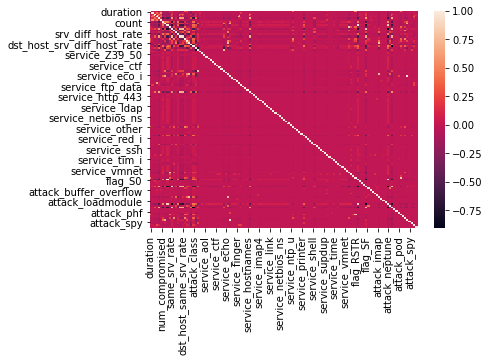

In [36]:
sns.heatmap(train_new.corr())

# Variable reduction using Select K-Best technique

In [37]:
X = train_new[train_new.columns.difference(['attack_class'])]
X_new = SelectKBest(f_classif, k=15).fit(X, train_new['attack_class'] )

C:\Users\Jitesh Chandani\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


In [38]:
X_new.get_support()

array([False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False, False, False,  True,
        True,  True,  True, False, False, False, False, False, False,
        True, False, False, False,  True, False, False,  True,  True,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [39]:
# capturing the important variables
KBest_features=X.columns[X_new.get_support()]
KBest_features

Index(['attack_neptune', 'attack_normal', 'attack_satan', 'count',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_same_srv_rate', 'dst_host_srv_count', 'flag_S0', 'flag_SF',
       'last_flag', 'logged_in', 'same_srv_rate', 'serror_rate',
       'service_http'],
      dtype='object')

Final list of variable selected for the model building using Select KBest

In [40]:
top_features=['attack_neptune','attack_normal','attack_satan','count','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_same_srv_rate','dst_host_srv_count','flag_S0','flag_SF','last_flag','logged_in','same_srv_rate','serror_rate','service_http']

In [41]:
train=train_new
test=test_new

In [42]:
X_train = train[top_features]
y_train = train['attack_class']
X_test = test[top_features]
y_test = test['attack_class']

# Model Building

Logistic Regression

In [43]:
mul_lr=LogisticRegression(multi_class='multinomial', solver='newton-cg',n_jobs=-1,class_weight='balanced')

In [44]:
mul_lr.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', multi_class='multinomial',
                   n_jobs=-1, solver='newton-cg')

In [45]:
y_pred=mul_lr.predict(X_test)

In [46]:
# Test Accuracy
mul_lr.score(X_test,y_test)

0.8290821984651555

In [47]:
#train accuracy

mul_lr.score(X_train,y_train)

0.9968564442892072

In [48]:
#Confusion matrix

tree=metrics.confusion_matrix(y_test,y_pred)
tree

array([[9598,    0,  113,    0,    0],
       [   0, 7011,  448,    0,    0],
       [   0,  340, 2081,    0,    0],
       [   0, 1042, 1843,    0,    0],
       [   0,    0,   67,    0,    0]], dtype=int64)

Decision Tree

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import sklearn.tree as dt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz, export
from sklearn.model_selection import GridSearchCV

C:\Users\Jitesh Chandani\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.tree.export module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


In [50]:
clf_tree = DecisionTreeClassifier( max_depth = 5)
clf_tree=clf_tree.fit( X_train, y_train )

In [52]:
y_pred=clf_tree.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8202546244954088

In [55]:
clf_tree.score(X_train,y_train)

0.9975788270409297

Tuning the parameters

In [56]:
param_grid = {'max_depth': np.arange(3, 9),
             'max_features': np.arange(3,9)}

In [57]:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)
tree.fit( X_train, y_train )

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([3, 4, 5, 6, 7, 8]),
                         'max_features': array([3, 4, 5, 6, 7, 8])})

In [58]:
tree.best_params_

{'max_depth': 8, 'max_features': 7}

Building Final Model

In [65]:
clf_tree1 = DecisionTreeClassifier( max_depth = 8, max_features=7 )
clf_tree1.fit( X_train, y_train )

DecisionTreeClassifier(max_depth=8, max_features=7)

In [66]:
# summarize the selection of the attributes
import itertools
feature_map = [(i, v) for i, v in itertools.zip_longest(X_train.columns, clf_tree.feature_importances_)]

feature_map

[('attack_neptune', 0.03259831472979103),
 ('attack_normal', 0.11586151451416901),
 ('attack_satan', 0.01004002834054721),
 ('count', 0.044032089051709564),
 ('dst_host_diff_srv_rate', 0.029548620940951634),
 ('dst_host_same_src_port_rate', 0.02178482161915282),
 ('dst_host_same_srv_rate', 0.00028741727973360964),
 ('dst_host_srv_count', 0.04161743132592316),
 ('flag_S0', 0.00018878586102844019),
 ('flag_SF', 0.04655361604784232),
 ('last_flag', 0.13365662020425828),
 ('logged_in', 0.0),
 ('same_srv_rate', 0.5177022924244898),
 ('serror_rate', 0.0009533531404917034),
 ('service_http', 0.005175094519911333)]

In [67]:
Feature_importance = pd.DataFrame(feature_map, columns=['Feature', 'importance'])
Feature_importance.sort_values('importance', inplace=True, ascending=False)
Feature_importance

,Feature,importance
12,same_srv_rate,0.517702
10,last_flag,0.133657
1,attack_normal,0.115862
9,flag_SF,0.046554
3,count,0.044032
7,dst_host_srv_count,0.041617
0,attack_neptune,0.032598
4,dst_host_diff_srv_rate,0.029549
5,dst_host_same_src_port_rate,0.021785
2,attack_satan,0.010040


In [68]:
tree_test_pred = pd.DataFrame( { 'actual':  y_test,
                            'predicted': clf_tree.predict( X_test ) } )

In [69]:
tree_test_pred.sample( n = 10 )

,actual,predicted
6558,0.0,0.0
13611,0.0,0.0
2754,0.0,0.0
7210,0.0,0.0
12188,3.0,1.0
5177,0.0,0.0
16107,2.0,2.0
2146,1.0,1.0
3063,0.0,0.0
14286,1.0,1.0


In [70]:
accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )

0.8224282482367032

In [72]:
clf_tree1.score(X_train,y_train)

0.9986584320325151

# Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [74]:
#Making object of the model and setting its parameter

rfc=RandomForestClassifier(max_depth=5)

In [78]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=5)

In [76]:
y_pred=rfc.predict(X_test)

In [77]:
#Train accuracy

rfc.score(X_train,y_train)

0.9979042961928047

In [79]:
#Test accuracy 

rfc.score(X_test,y_test)

0.8167945703766136

Tuning the parameters

In [80]:
param_grid = {'max_depth': np.arange(3, 9),
             'max_features': np.arange(3,9)}

In [81]:
rfc1 = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5)
rfc1.fit( X_train, y_train )

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([3, 4, 5, 6, 7, 8]),
                         'max_features': array([3, 4, 5, 6, 7, 8])})

In [83]:
rfc1.best_params_

{'max_depth': 8, 'max_features': 3}

In [84]:
final_rfc = RandomForestClassifier(max_depth = 8, max_features = 3)
final_rfc.fit( X_train, y_train)

RandomForestClassifier(max_depth=8, max_features=3)

In [85]:
final_rfc.score( X_train, y_train)

0.998682246848506

In [86]:
#Test accuracy 

final_rfc.score(X_test,y_test)

0.8319655768974848

In [87]:
#Confusion matrix

metrics.confusion_matrix(y_test,y_pred)

array([[9711,    0,    0,    0,    0],
       [   0, 6805,  654,    0,    0],
       [   0,  358, 2063,    0,    0],
       [   0,  573, 2312,    0,    0],
       [   0,    0,   67,    0,    0]], dtype=int64)

# Save Model

In [88]:
import pickle
# Saving model to disk of random forest
pickle.dump(final_rfc, open('rfc.pkl','wb'))

# Load and Predict

In [89]:
model=pickle.load(open('rfc.pkl', 'rb'))
model.predict([[1,0,0,229,0.06,0.00,0.04,10,0,0,21,0,0.04,0.00,0]])

array([1.])